This detected spike shapes from the detection method are stored in hdf5 data file. Part of the datafile is extracted which contains the data points for all the detected spikes. 

<img src="retina_INT_density_amp.png" height = "300" width = "300">


In [317]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly 
from plotly.graph_objs import *
plotly.tools.set_credentials_file(username='nikeshlama', api_key='XA5BJ2oAtW0JBmNlyUdu')
import plotly.plotly as py
import plotly.tools as plotly_tools
import plotly.graph_objs as go
py.sign_in("nikeshlama", "XA5BJ2oAtW0JBmNlyUdu")
#import plotly as py
#py.tools.set_credentials_file(username='nikeshlama', api_key='••••••••••')
#py.sign_in("nikeshlama","••••••••••")
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [138]:
import numpy as np
import h5py
import sklearn


In [139]:
print(__doc__)
#Reading hdf5 file 
hdfFile = h5py.File('retina_INT_v28.hdf5','r')

Automatically created module for IPython interactive environment


In [140]:
#Reading from RawEvents group
RawEvents = hdfFile.require_group('RawEvents/')

In [141]:
#loading data from Shapes member, which contains the spike shapes
shapes = RawEvents['Shapes']
Co_ordinates = RawEvents['Locations']

In [142]:
#simply printing gives, the dimension of the matrix that contains spike shapes
#each row has data points for the spike shapes, 
shapes


<HDF5 dataset "Shapes": shape (676574, 25), type "<f4">

In [143]:
#accessing single data spike datapoints 
shapes[1,:]

array([ 1.31781316,  0.51772791,  0.69497401,  1.88095164,  0.7723    ,
        1.58710933,  1.11932456, -9.6026144 , -6.66282034,  1.0038085 ,
        5.58194447,  4.3732934 ,  3.83351326,  2.85887957,  3.03270698,
        1.05138969,  1.83057249,  1.09494114,  1.21777594,  0.4228366 ,
        1.03846478,  0.        ,  0.        ,  0.        ,  0.        ], dtype=float32)

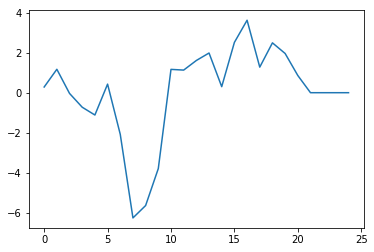

In [144]:
#single spike shape from the array of spike shapes
plt.plot(shapes[0,:])

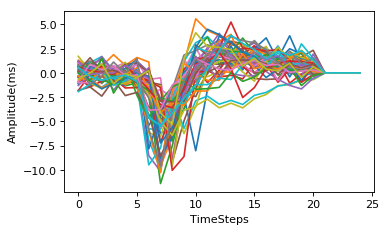

In [145]:
#plotting many spikes on top of each other
#These are all the spike shapes identified previously
fig=plt.figure(figsize=(5, 3), dpi= 80, facecolor='w', edgecolor='k')
for i in range(50):
    plt.plot(shapes[i,:])
plt.xlabel('TimeSteps')
plt.ylabel('Amplitude(ms)')

In [146]:
Co_ordinates


<HDF5 dataset "Locations": shape (676574, 2), type "<f4">

In [147]:
#plt.scatter(Co_ordinates[0,0], Co_ordinates[0,1])
#Co_ordinates[0,0]

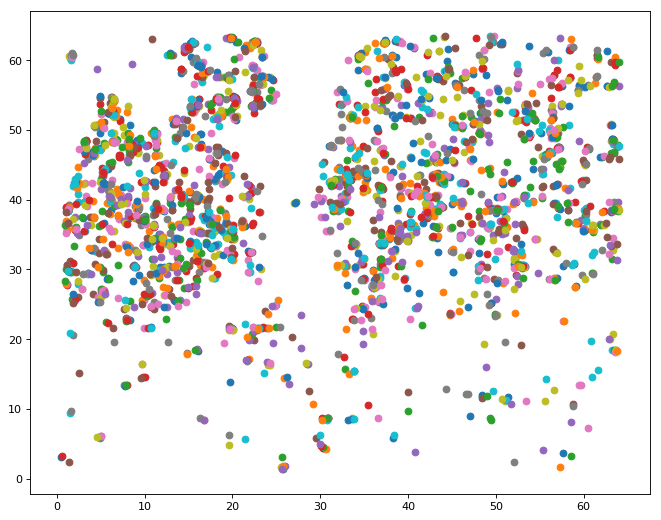

In [148]:
cmap = plt.cm.hot
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
for i in range(3000):
    plt.scatter(Co_ordinates[i,0],Co_ordinates[i,1])

In [321]:
pca = decomposition.PCA(n_components = 4)
print(pca.fit(shapes))
T = pca.transform(shapes[1:676574,:])
print(pca.explained_variance_ratio_)
cov = pca.get_covariance()

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[ 0.24201014  0.14079575  0.13018094  0.11100728]


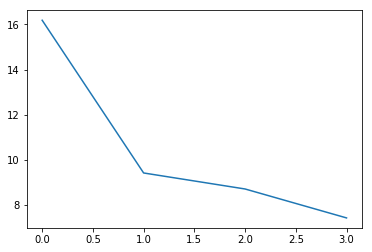

In [323]:
#print(cov)
plt.plot(pca.explained_variance_)
#plt.plot(cov)
# fig = plt.figure(1, figsize=(4, 3))
# plt.clf()
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=40, azim=134)

In [257]:
# ax.scatter(T[0, :], T[1, :], T[2, :], cmap=plt.cm.spectral)
# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
# plt.show()

In [324]:

#for i in range(4999):
x = np.asarray(T[0:5000,0])
y = np.asarray(T[0:5000,1])
z = np.asarray(T[0:5000,2])


# Create a trace
trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers'
)

data = [trace]





In [325]:
layout = Layout(
    title='PCA of the spike shapes',
    scene=Scene(
        xaxis=XAxis(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=YAxis(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
#         zaxis=ZAxis(
#             gridcolor='rgb(255, 255, 255)',
#             zerolinecolor='rgb(255, 255, 255)',
#             showbackground=True,
#             backgroundcolor='rgb(230, 230,230)'
#         )
    )
)
#end of layout

fig = Figure(data = data, layout = layout)
#py.iplot(fig, filename = 'testplot', sharing = 'public')
py.iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3) )], show_link=False, sharing = 'public')

In [326]:
#import cufflinks as cf

In [327]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(T, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
print(ms.fit(T))


In [279]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print('number of estimated cluseters: %d' % n_clusters_)

number of estimated cluseters: 156


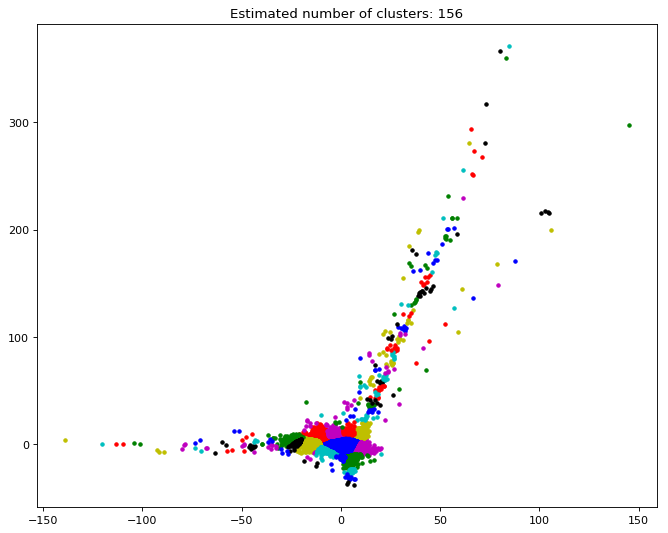

In [283]:
from itertools import cycle
plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(T[my_members, 0], T[my_members, 1], col + '.')
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             #markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()